In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Đọc dữ liệu từ file CSV
df = pd.read_csv('player_shooting_2023_2024.csv')

# Hiển thị thông tin cơ bản về dữ liệu
print(df.info())
print(df.describe())

# Tiền xử lý dữ liệu (xử lý giá trị thiếu, mã hóa biến phân loại)
df = df.dropna()  # Loại bỏ các hàng có giá trị thiếu
df = pd.get_dummies(df, columns=['Pos'], drop_first=True)  # Mã hóa biến phân loại Pos

# Chọn biến đầu vào (features) và biến mục tiêu (target)
features = ['Age', '90s', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'Dist', 'FK', 'PK', 'PKatt']
features += [col for col in df.columns if col.startswith('Pos_')]
X = df[features]
y = df['xG']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   584 non-null    int64  
 1   Rk           584 non-null    object 
 2   Player       584 non-null    object 
 3   Nation       584 non-null    object 
 4   Pos          584 non-null    object 
 5   Squad        584 non-null    object 
 6   Age          562 non-null    float64
 7   Born         562 non-null    float64
 8   90s          562 non-null    float64
 9   Gls          562 non-null    float64
 10  Sh           562 non-null    float64
 11  SoT          562 non-null    float64
 12  SoT%         457 non-null    float64
 13  Sh/90        562 non-null    float64
 14  SoT/90       562 non-null    float64
 15  G/Sh         457 non-null    float64
 16  G/SoT        395 non-null    float64
 17  Dist         457 non-null    float64
 18  FK           562 non-null    float64
 19  PK      

In [2]:
df.head()

,Unnamed: 0,Rk,Player,Nation,Squad,Age,Born,90s,Gls,Sh,...,Matches,Birth Month,"Pos_DF,FW","Pos_DF,MF",Pos_FW,"Pos_FW,DF","Pos_FW,MF",Pos_MF,"Pos_MF,DF","Pos_MF,FW"
1,1,2,Bénie Adama Traore,CIV,Sheffield Utd,21.0,2002.0,4.3,0.0,1.0,...,Matches,April,False,False,False,False,True,False,False,False
3,3,4,Tosin Adarabioyo,ENG,Fulham,26.0,1997.0,16.0,2.0,14.0,...,Matches,February,False,False,False,False,False,False,False,False
4,4,5,Elijah Adebayo,ENG,Luton Town,26.0,1998.0,12.9,9.0,28.0,...,Matches,June,False,False,True,False,False,False,False,False
5,5,6,Simon Adingra,CIV,Brighton,22.0,2002.0,18.8,6.0,36.0,...,Matches,May,False,False,True,False,False,False,False,False
6,6,7,Nayef Aguerd,MAR,West Ham,28.0,1996.0,19.6,1.0,14.0,...,Matches,August,False,False,False,False,False,False,False,False


In [3]:
# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.176366090511245


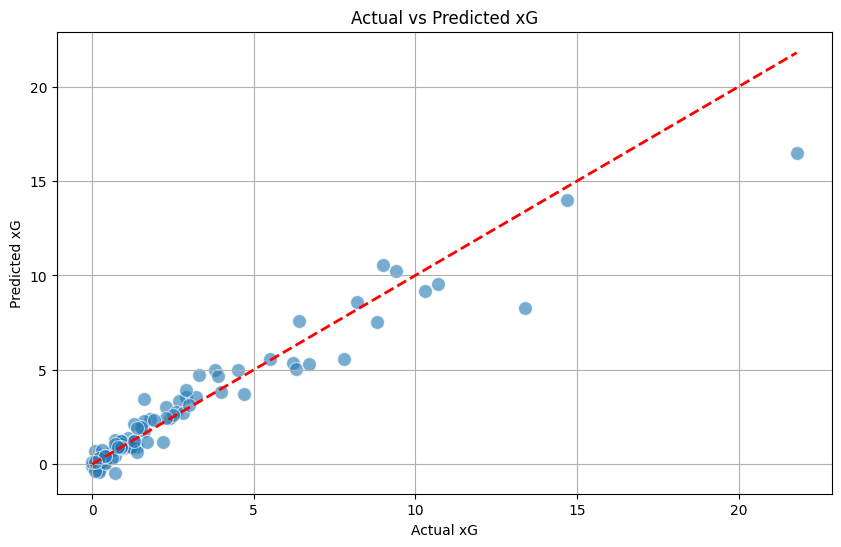

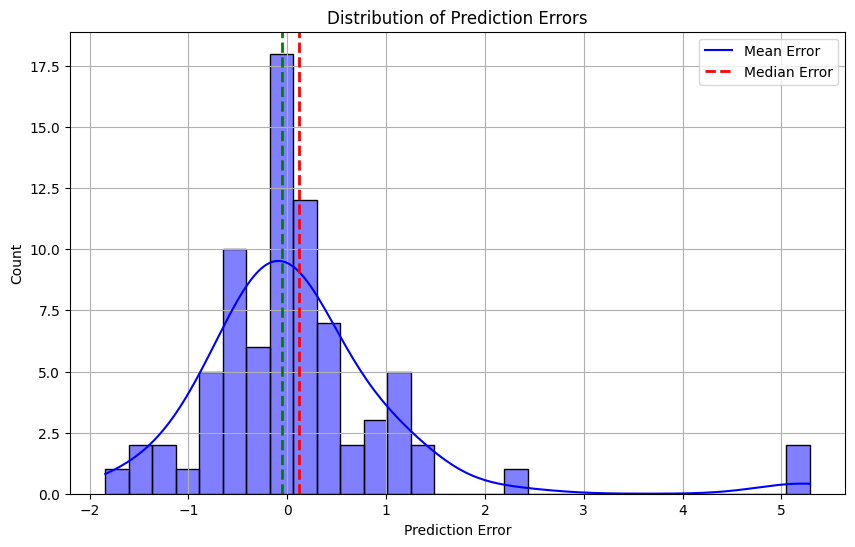

In [4]:
# Trực quan hóa kết quả dự đoán so với giá trị thực tế
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual xG')
plt.ylabel('Predicted xG')
plt.title('Actual vs Predicted xG')
plt.grid(True)
plt.show()

# Trực quan hóa phân phối của sai số dự đoán
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=30)
plt.axvline(errors.mean(), color='red', linestyle='--', linewidth=2)
plt.axvline(errors.median(), color='green', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.legend({'Mean Error': errors.mean(), 'Median Error': errors.median()})
plt.grid(True)
plt.show()

                Player            Squad   xG  Predicted_xG
1   Bénie Adama Traore    Sheffield Utd  0.3      0.092939
3     Tosin Adarabioyo           Fulham  0.7      1.566180
4       Elijah Adebayo       Luton Town  5.6      4.409135
5        Simon Adingra         Brighton  3.3      4.719677
6         Nayef Aguerd         West Ham  1.5      1.575138
8     Naouirou Ahamada   Crystal Palace  0.4      0.448476
9     Anel Ahmedhodžić    Sheffield Utd  2.6      1.659748
10            Ola Aina  Nott'ham Forest  0.2     -0.530628
11     Rayan Aït-Nouri           Wolves  3.1      1.930595
12     Kristoffer Ajer        Brentford  1.1      1.363359


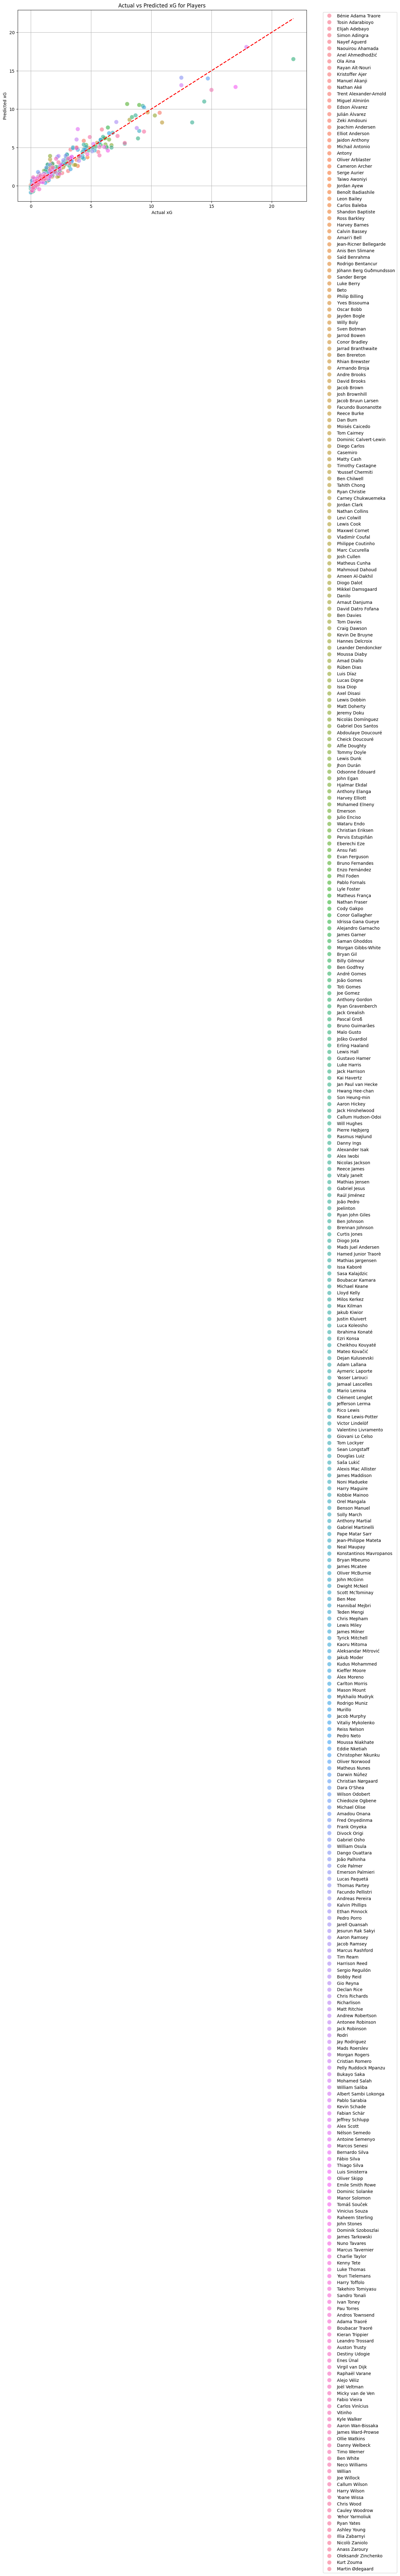

            Squad    xG  Predicted_xG
0         Arsenal  62.9     62.173778
1     Aston Villa  56.4     52.199272
2     Bournemouth  46.2     45.449758
3       Brentford  52.1     44.800214
4        Brighton  47.8     52.524408
5         Burnley  30.9     33.121872
6         Chelsea  57.0     52.277046
7  Crystal Palace  33.7     36.840432
8         Everton  47.9     45.318287
9          Fulham  44.5     50.991831


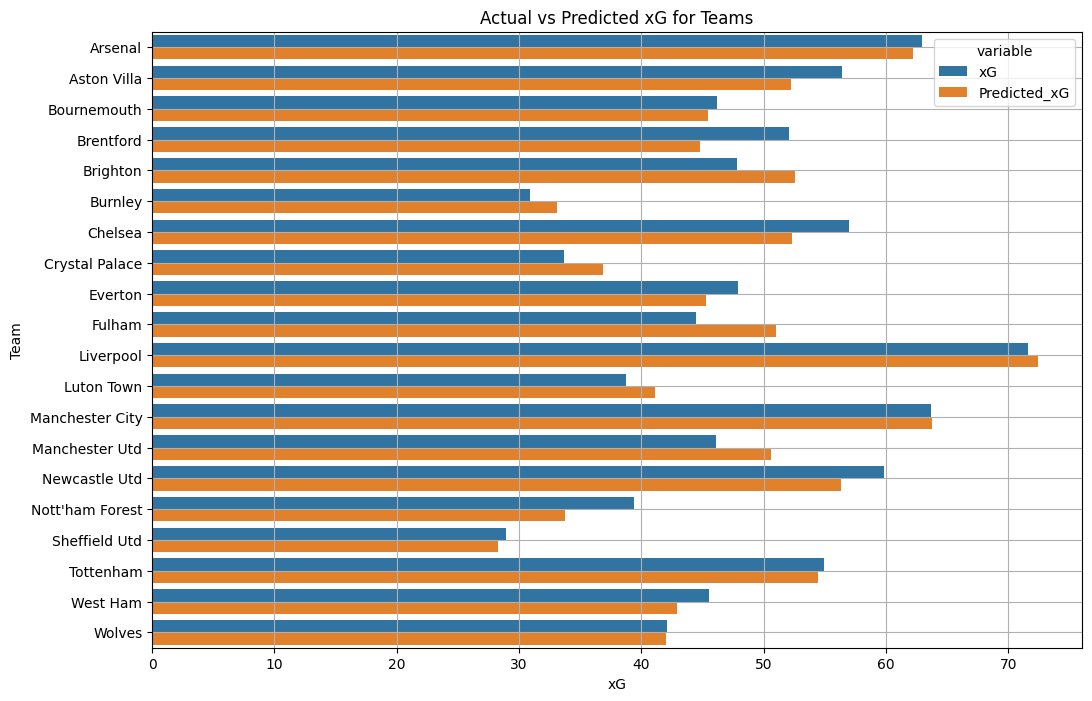

In [5]:
# Thêm dự đoán xG vào DataFrame
df['Predicted_xG'] = model.predict(df[features])

# Hiển thị một số cầu thủ cùng với xG thực tế và xG dự đoán
print(df[['Player', 'Squad', 'xG', 'Predicted_xG']].head(10))

# Trực quan hóa xG thực tế và xG dự đoán cho từng cầu thủ
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='xG', y='Predicted_xG', hue='Player', alpha=0.6, s=100)
plt.plot([df['xG'].min(), df['xG'].max()], [df['xG'].min(), df['xG'].max()], '--r', linewidth=2)
plt.xlabel('Actual xG')
plt.ylabel('Predicted xG')
plt.title('Actual vs Predicted xG for Players')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Tính tổng xG thực tế và xG dự đoán cho từng đội bóng
team_xg = df.groupby('Squad')[['xG', 'Predicted_xG']].sum().reset_index()

# Hiển thị một số đội bóng cùng với xG thực tế và xG dự đoán
print(team_xg.head(10))

# Trực quan hóa xG thực tế và xG dự đoán cho từng đội bóng
plt.figure(figsize=(12, 8))
sns.barplot(data=team_xg.melt(id_vars='Squad', value_vars=['xG', 'Predicted_xG']), x='value', y='Squad', hue='variable')
plt.xlabel('xG')
plt.ylabel('Team')
plt.title('Actual vs Predicted xG for Teams')
plt.grid(True)
plt.show()
